# Milk Prediction in Ireland Project

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import warnings
from sklearn.ensemble import RandomForestRegressor

## Data exploration and visualization

In [111]:
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

data = pd.read_excel('Ire_EU_Milk_Prices.xlsx', sheet_name=0, skiprows=6, index_col=0)

In [112]:
# Clean datas
columns_to_delete = [col for col in data.columns if 'Unnamed' in str(col)]
data.drop(columns=columns_to_delete, inplace=True)
data = data.iloc[:, :-3]
data.replace('c', np.nan, inplace=True)
data.dropna(inplace=True)
data.index = pd.to_datetime(data.index, format='%Ym%m')

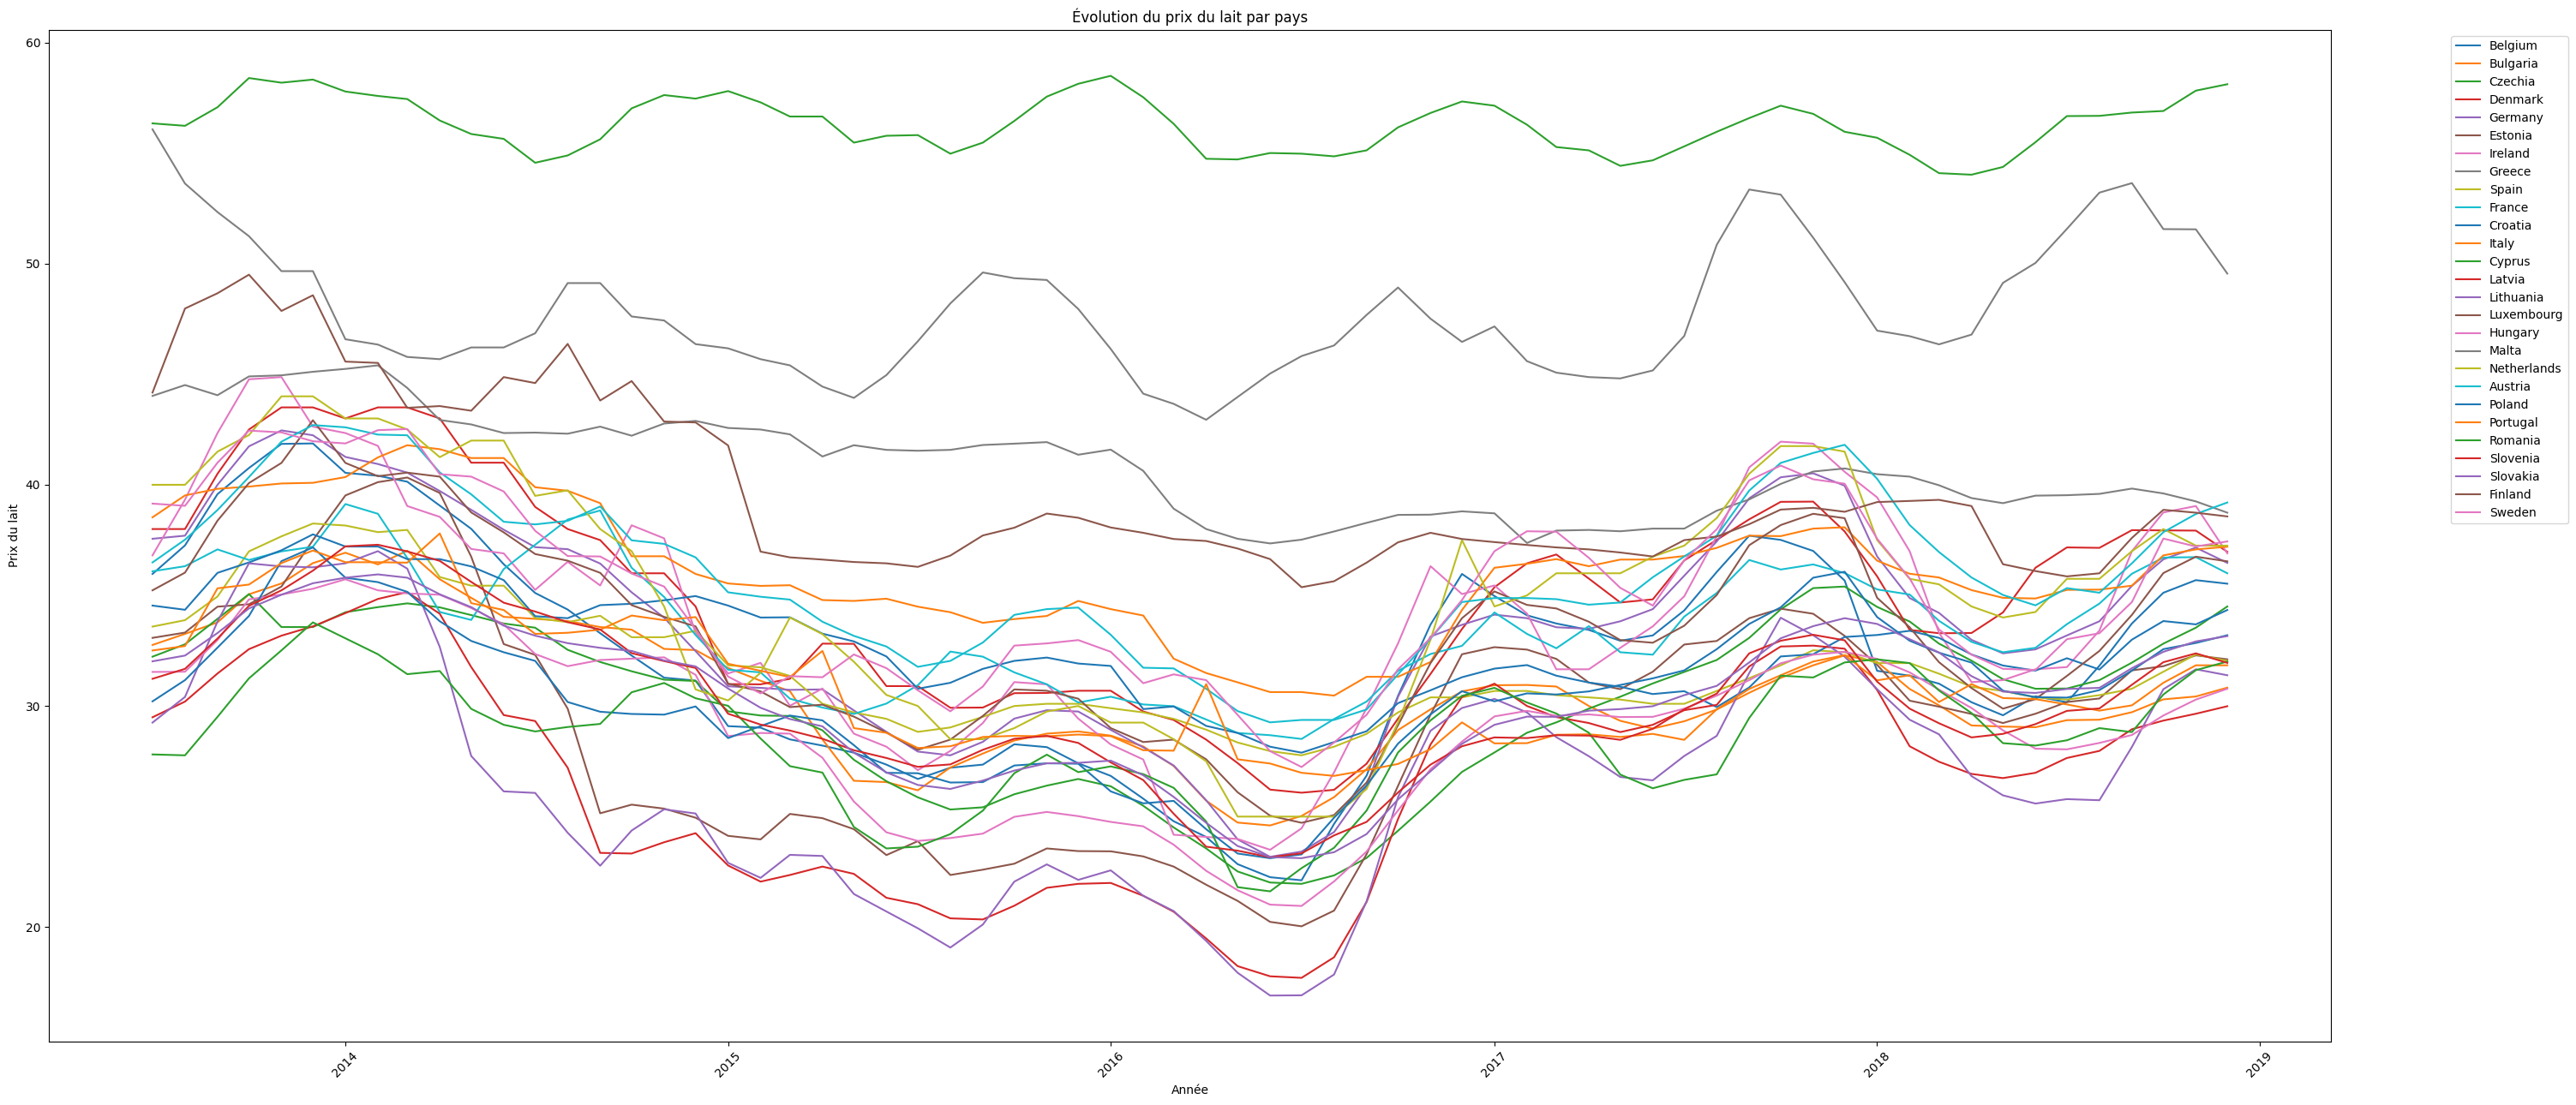

In [113]:
# Graph of the evolution of milk prices by country
plt.figure(figsize=(30, 13))
for country in data.columns:
    filtered_data = data[data[country] != 0]
    plt.plot(filtered_data.index, filtered_data[country], label=country)
plt.xlabel('Année')
plt.ylabel('Prix du lait')
plt.title('Évolution du prix du lait par pays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('milk_price_evolution.png')

price_data = data

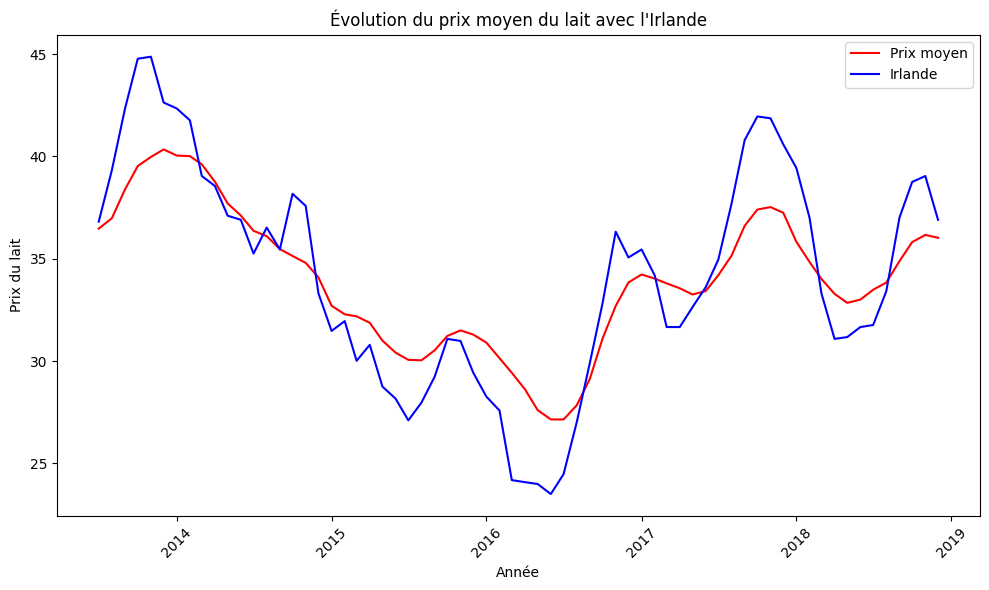

In [114]:
# Irland / EU
average_prices = data.mean(axis=1)
ireland_data = data[data['Ireland'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(data.index, average_prices, label='Prix moyen', color='red')
plt.plot(ireland_data.index, ireland_data['Ireland'], label='Irlande', color='blue')
plt.xlabel('Année')
plt.ylabel('Prix du lait')
plt.title('Évolution du prix moyen du lait avec l\'Irlande')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('milk_price_evolution_with_ireland.png')

In [115]:
price_data.to_excel('Data.xlsx', index=True)

print("La copie des données des prix a été sauvegardée dans 'Data.xlsx'.")

La copie des données des prix a été sauvegardée dans 'Data.xlsx'.


In [116]:
file_path = '4 Data Grass Growth Yearly & Monthly 2013-2024.xlsx' 
print(data.head())

            Belgium Bulgaria  Czechia  Denmark  Germany  Estonia  Ireland  \
2013-07-01    35.97    32.76    32.23     38.0    37.56    33.08    36.81   
2013-08-01    37.26    33.26    32.79     38.0    37.70    33.32    39.33   
2013-09-01    39.58    33.78    33.94     40.5    40.00    34.49    42.34   
2013-10-01    40.76    35.05    35.06     42.5    41.74    34.60    44.77   
2013-11-01    41.85    35.54    33.57     43.5    42.46    35.40    44.87   

            Greece  Spain  France  ...  Malta  Netherlands  Austria  Poland  \
2013-07-01   44.02  33.59   36.09  ...  56.07        40.00    36.49   30.21   
2013-08-01   44.51  33.88   36.32  ...  53.62        40.00    37.52   31.17   
2013-09-01   44.05  34.95   37.08  ...  52.33        41.50    38.86   32.64   
2013-10-01   44.90  36.99   36.60  ...  51.24        42.25    40.35   34.07   
2013-11-01   44.95  37.67   36.99  ...  49.66        44.00    41.95   36.55   

            Portugal Romania  Slovenia  Slovakia  Finland Swed

In [117]:
data = data.iloc[:-17]
print (data.shape[0])
print(data.tail)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b')

plt.figure(figsize=(15, 10))
for year in data.columns[1:]: 
    plt.plot(data['Date'], data[year], label=year)

# Add title
plt.title('Quantité d\'herbe en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Quantité d\'herbe')
plt.legend(title='Année')
plt.grid(True)

plt.show()
grass_data = data


49
<bound method NDFrame.tail of             Belgium Bulgaria  Czechia  Denmark  Germany  Estonia  Ireland  \
2013-07-01    35.97    32.76    32.23    38.00    37.56    33.08    36.81   
2013-08-01    37.26    33.26    32.79    38.00    37.70    33.32    39.33   
2013-09-01    39.58    33.78    33.94    40.50    40.00    34.49    42.34   
2013-10-01    40.76    35.05    35.06    42.50    41.74    34.60    44.77   
2013-11-01    41.85    35.54    33.57    43.50    42.46    35.40    44.87   
2013-12-01    41.87    36.46    33.57    43.50    42.24    37.50    42.63   
2014-01-01    40.54    36.93    34.24    43.00    41.26    39.52    42.34   
2014-02-01    40.41     36.4    34.47    43.50    40.94    40.12    41.76   
2014-03-01    40.14    37.02    34.64    43.50    40.55    40.33    39.04   
2014-04-01    39.06    35.73    34.46    43.00    39.72    39.63    38.55   
2014-05-01    38.01    34.89    34.11    41.00    38.87    36.75    37.10   
2014-06-01    36.41    34.03    33.73    41

KeyError: 'Date'

## Tab creation

In [ ]:
data = grass_data

# Utiliser la méthode melt pour réorganiser les données
melted_data = data.melt(id_vars=['Date'], var_name='Year', value_name='Grass')

# Convertir la colonne 'Year' en chaîne de caractères
melted_data['Year'] = melted_data['Year'].astype(str)

# Convertir la colonne 'Date' en chaîne de caractères
melted_data['Date'] = melted_data['Date'].astype(str)

# Concaténer la colonne 'Date' avec la colonne 'Year' en ajoutant un séparateur
melted_data['Date'] = melted_data['Date'] + '-' + melted_data['Year']

# Convertir les valeurs concaténées en type datetime en spécifiant `utc=True`
melted_data['Date'] = pd.to_datetime(melted_data['Date'], utc=True)

# Supprimer la colonne 'Year' qui n'est plus nécessaire
melted_data.drop(columns=['Year'], inplace=True)

# Trier les données par date
melted_data.sort_values(by='Date', inplace=True)

# Réinitialiser l'index
melted_data.reset_index(drop=True, inplace=True)

# Afficher les premières lignes pour vérifier
print(melted_data.head())

# Enregistrer le tableau dans un fichier Excel
melted_data.to_excel('tableau_grass_melted.xlsx', index=False)


In [ ]:
data = grass_data

for elem in data.columns[1:]:
    elem = str(elem)+'2013'
print(grass_data)